In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def quadratic_function(x):
  return x**2 

In [3]:
np.random.seed(3)
#generate 200 samples
n = 100
X = np.random.uniform(-1,1,n)
Y = np.array([quadratic_function(x) for x in X])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

80 20


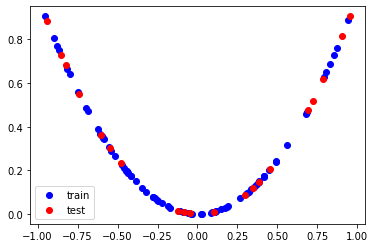

In [4]:
def plot(x, y, color, label, marker = 'o'):
  plt.scatter(x, y, color=color, label=label, marker=marker)
  plt.legend()

plot(X_train, Y_train, 'b', 'train')
plot(X_test, Y_test, 'r', 'test')

In [5]:
def NeuralNetwork(num_hidden_layer, units_per_hidden_laye):
  if(num_hidden_layer != len(units_per_hidden_laye)):
    return None
  model = tf.keras.Sequential()
  model.add(tf.keras.Input([1], name = 'input'))
  for i in range(num_hidden_layer):
    model.add(tf.keras.layers.Dense(units_per_hidden_laye[i], activation = 'relu', name = 'hidden_layer_' + str(i+1)))
  model.add(tf.keras.layers.Dense(1, name='output'))

  return model

In [6]:
model = NeuralNetwork(2, [10,8])
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 10)                20        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 8)                 88        
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train, Y_train, epochs=1000, verbose=1)

Epoch 1/1000
3/3 [==============================] - 1s 4ms/step - loss: 0.1125
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1173
Epoch 3/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0886
Epoch 4/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 5/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0664
Epoch 6/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0564
Epoch 7/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 9/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0512
Epoch 10/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0417
Epoch 11/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0424
Epoch 12/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0363
Epoch 13/1000
3/3 [==============================

In [8]:
prediction = model.evaluate(X_test, Y_test)
print(prediction)

1/1 [==============================] - 0s 111ms/step - loss: 4.1722e-05
4.172188710072078e-05


In [9]:
a = .25
pred = model.predict([a])
print('GT', quadratic_function(a))
print('Prediction', float(pred))

GT 0.0625
Prediction 0.06373167037963867


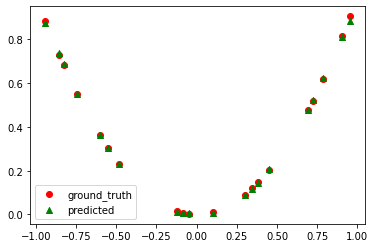

In [10]:
outs =[]
for x in X_test:
  outs.append(float(model.predict([x])))

plot(X_test, Y_test, 'r', 'ground_truth')
plot(X_test, outs, 'g', 'predicted', marker = '^')